# Midterm Project

For the midterm project you'll get to practice the data science process by trying out a regression problem! You'll then get to compare your model performance to other peers' work on the same dataset as well as work on several other datasets. This will allow you to see new ideas on the same problem as well as nuances of the same technique across different datasets. 

# Datasets

You will take one of the following datasets and apply a standard data science process of exploratory analysis, cleaning and machine learning. This process will be outlined in several large stages. To start, take your dataset, import the data and begin doing some initial exploratory analysis using the tools and techniques we have covered thus far. You will find all three datasets under a folder titled 'Datasets'.


* Walmart Sales Forecasting
* Estimating NYC Cab Trip Duration
* Lego Sets (previously seen)

## Project Outline
* Load Data
* Exploratory Analysis
* Initial Model
* Evaluation
* Feature Engineering
* Model 2
* Evaluation
* Further Investigation/Exploration

# Load the Data

In [1]:
#Your code here

import pandas as pd 
import numpy as np
import plotnine 
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df1 = pd.read_csv('Walmart_Sales_Forecasting.csv')
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
df1.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [3]:
pwd #tell you where your link is

'/Users/adriansubagyo/Desktop/FlatironDS/Midterm/ds-skills-midterm-intro-nyc-ds-100218'

In [4]:
df2 = pd.read_csv('features.csv')
df2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
final = pd.merge(df1, df2) #which two dataframes to combine, and what columns to merge data in on.
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


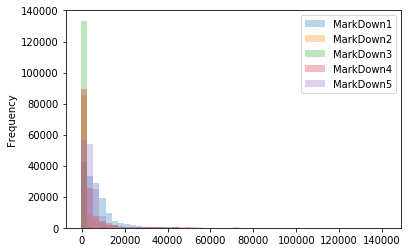

In [6]:
#histogram - show that its better to fillna with 0 rather than drop
ax = final[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].plot.hist(bins=50, alpha=0.3)

In [53]:
final.shape

(421570, 14)

# Exploratory Data Analysis

In [7]:
finalfill = final.fillna(0)
finalfill.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


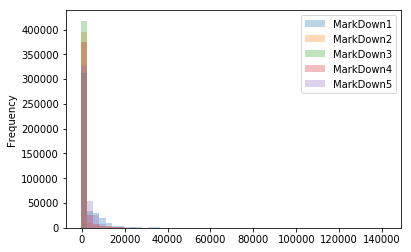

In [8]:
axfill = finalfill[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].plot.hist(bins=50, alpha=0.3)

In [9]:
#fil na with mean 
finalx = final.copy()
finalx['MarkDown1'] = finalx['MarkDown1'].fillna((finalx['MarkDown1'].mean()))
finalx['MarkDown2'] = finalx['MarkDown2'].fillna((finalx['MarkDown2'].mean()))
finalx['MarkDown3'] = finalx['MarkDown3'].fillna((finalx['MarkDown3'].mean()))
finalx['MarkDown4'] = finalx['MarkDown4'].fillna((finalx['MarkDown4'].mean()))
finalx['MarkDown5'] = finalx['MarkDown5'].fillna((finalx['MarkDown5'].mean()))
finalx.head()



                                                    

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106


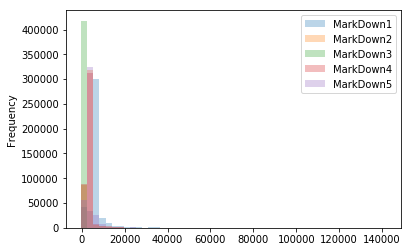

In [10]:
axx = finalx[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].plot.hist(bins=50, alpha=0.3)

In [11]:
#clean data dropna
finaldrop = final.dropna()
finaldrop.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
6587,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6588,1,2,2011-11-11,44936.47,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6589,1,3,2011-11-11,9959.64,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6590,1,4,2011-11-11,36826.52,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866
6591,1,5,2011-11-11,31002.65,False,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866


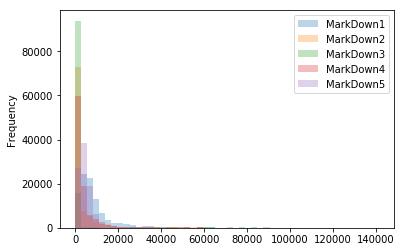

In [12]:
axdrop = finaldrop[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].plot.hist(bins=50, alpha=0.3)

In [ ]:
#finalx is fill mean
#finaldrop is drop
#finalfill is fill with 0

# Correlation

In [13]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(2), object(1)
memory usage: 45.4+ MB


[[ 1.00000000e+00 -1.20295545e-04]
 [-1.20295545e-04  1.00000000e+00]]


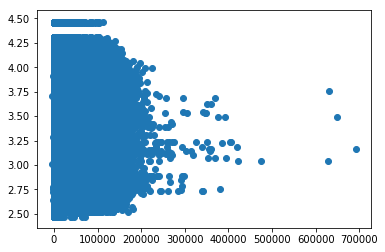

In [14]:
#find correlation Weekly Sales and Fuel Price
x , y = final.Weekly_Sales, final.Fuel_Price
print(np.corrcoef(x,y))
plt.scatter(x,y)

[[ 1.         -0.02092134]
 [-0.02092134  1.        ]]


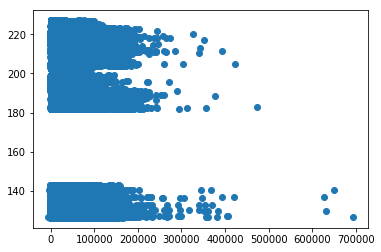

In [15]:
#find correlation
x , y = final.Weekly_Sales, final.CPI
print(np.corrcoef(x,y))
plt.scatter(x,y)

[[nan nan]
 [nan nan]]


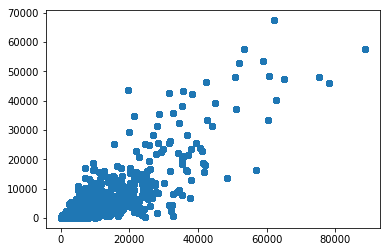

In [16]:
#find correlation
x , y = final.MarkDown1, final.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

[[1.         0.78534109]
 [0.78534109 1.        ]]


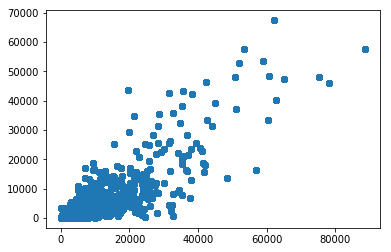

In [18]:
#find correlation
x , y = finalx.MarkDown1, finalx.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

Correlated

[[1.         0.78534109]
 [0.78534109 1.        ]]


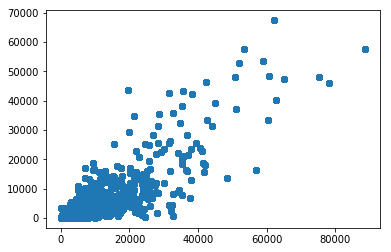

In [19]:
#find correlation
x , y = finalx.MarkDown1, finalx.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

# Heat Map (Optional)

In [20]:
#fancy heat map thing
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


TypeError: Image data cannot be converted to float

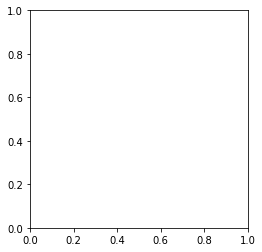

In [87]:
y_labels = finalx.index
x_labels = finalx.columns
data = np.array(finalx)


fig, ax = plt.subplots()
im = ax.imshow(data, cmap='Blues')

# We want to show all ticks...
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        value = data[i, j]
        if value < .5:
            text_color = 'black'
        else:
            text_color = 'white'
        text = ax.text(j, i, value,
                       ha="center", va="center", color=text_color)

ax.set_title("Walmart Weekly Sales")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Age Group Percentage', rotation=-90, va="bottom")

plt.xlabel('Senior Citizen Flag')
plt.ylabel('Type of Internet Service')
fig.tight_layout()
plt.show()

In [ ]:
#test
weights = pd.DataFrame.from_dict(weight_dict, orient='index').reset_index()
weights.columns = ['Feature', 'Original_Weight']
weights['New_Weight'] = weights.Feature.map(new_weight_dict)
weights['Change'] = np.abs(weights['New_Weight'] - weights['Original_Weight']) #Net change (absolute value)
weights = weights.sort_values(by='Change', ascending=False)
weights['MkDwn4_Corr'] = weights.Feature.map(lambda feat: np.corrcoef(df.MarkDown4, df[feat])[0][1])
weights['Percent_Change'] = weights.Change / weights.Original_Weight
weights.sort_values(by='Percent_Change', ascending=False)

In [ ]:
#finalx is fill mean
#finaldrop is drop
#finalfill is fill with 0

# Initial Model

In [21]:
#finalx
for col in ['Store', 'Dept']:# makes a bunch of colums into numeric "dummy" values at the same time
   finalx[col] = finalx[col].astype(str) #Make nonumeric

In [22]:
#Convert category to number
finalx.IsHoliday = finalx.IsHoliday.map({True:1, False:0})# convert category into numeric so IsHoliday column can be use in analysis
finalx.IsHoliday.value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [31]:
#multicorrelation 
from sklearn.linear_model import LinearRegression

X = finalx[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work

y = finalx['Weekly_Sales']

linreg = LinearRegression()
linreg.fit(X, y)

final['Estimated_Weekly_Sales'] = linreg.predict(X)
print('R^2 model score:', linreg.score(X,y), '\n')

print('Model feature coefficients:')
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 5)))

R^2 model score: 0.03816897385186535 

Model feature coefficients:
Store Coefficient weight: -154.26489
Temperature Coefficient weight: 11.6127
Fuel_Price Coefficient weight: -100.75134
MarkDown1 Coefficient weight: 0.28079
MarkDown2 Coefficient weight: 0.06058
MarkDown3 Coefficient weight: 0.16901
MarkDown4 Coefficient weight: -0.15949
MarkDown5 Coefficient weight: 0.31563
CPI Coefficient weight: -27.59911
Unemployment Coefficient weight: -315.2619
Dept Coefficient weight: 111.74661


In [32]:
#multicorrelation without dummies
from sklearn.linear_model import LinearRegression

my_X = finalx[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown4', 'MarkDown5', 'Unemployment', 'Weekly_Sales', 'Dept']] #Only numeric features work

my_y = finalx['CPI']

linreg = LinearRegression()
linreg.fit(my_X, my_y)

final['Estimated_Weekly_Sales'] = linreg.predict(X)
print('R^2 model score:', linreg.score(my_X,my_y), '\n')

print('Model feature coefficients:')
new_weight_dict = dict(zip(my_X.columns, linreg.coef_))
for feat, coeff in list(zip(my_X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 5)))

R^2 model score: 0.19586751211489817 

Model feature coefficients:
Store Coefficient weight: -0.39356
Temperature Coefficient weight: 0.49498
Fuel_Price Coefficient weight: -16.85178
MarkDown1 Coefficient weight: -0.00023
MarkDown2 Coefficient weight: 4e-05
MarkDown3 Coefficient weight: -7e-05
MarkDown4 Coefficient weight: -1e-05
MarkDown5 Coefficient weight: 0.00038
Unemployment Coefficient weight: -6.35834
Weekly_Sales Coefficient weight: -7e-05
Dept Coefficient weight: 0.0045


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [27]:
#choosing a model
mod = LinearRegression() #run regression
mod.fit(X_train, y_train) #fit
#predicting
y_hat_train = mod.predict(X_train) #predict
y_hat_test = mod.predict(X_test) #never seen the test

#calculate and choose error
train_mse = np.sqrt(mean_squared_error(y_train,y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

#if train and test data is not close to one another
#overfit training data, test data is not similar enough to train data


Train Mean Squared Error: 22227.28058980491
Test Mean Squared Error: 22412.143768669845


In [ ]:
#test - weighted
weights = pd.DataFrame.from_dict(weight_dict, orient='index').reset_index()
weights.columns = ['Feature', 'Original_Weight']
weights['New_Weight'] = weights.Feature.map(new_weight_dict)
weights['Change'] = np.abs(weights['New_Weight'] - weights['Original_Weight']) #Net change (absolute value)
weights = weights.sort_values(by='Change', ascending=False)
weights['MkDwn4_Corr'] = weights.Feature.map(lambda feat: np.corrcoef(final.MarkDown4, final[feat])[0][1])
weights['Percent_Change'] = weights.Change / weights.Original_Weight
weights.sort_values(by='Percent_Change', ascending=True)

# Dummy Variables

In [28]:
NewX = pd.get_dummies(finalx[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Dept', 'IsHoliday']])
NewX.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,0,...,0,0,0,0,0,0,0,0,0,0
1,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,0,...,0,0,0,0,0,0,0,0,0,0
2,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,0,...,0,0,0,0,0,0,0,0,0,0
3,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,0,...,0,0,0,0,0,0,0,0,0,0
4,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Rerun regression with NewX
from sklearn.linear_model import LinearRegression

X = NewX
y = finalx['Weekly_Sales']

linreg = LinearRegression()
linreg.fit(X, y)

finalx['Estimated_Weekly_Sales'] = linreg.predict(X)
print('R^2 model score:', linreg.score(X,y), '\n')

print('Model feature coefficients:')
#save result
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 5)))

R^2 model score: 0.6578994523464625 

Model feature coefficients:
Temperature Coefficient weight: -13.01632
Fuel_Price Coefficient weight: -673.03085
MarkDown1 Coefficient weight: -0.00634
MarkDown2 Coefficient weight: -0.04538
MarkDown3 Coefficient weight: 0.09967
MarkDown4 Coefficient weight: -0.0174
MarkDown5 Coefficient weight: 0.03448
CPI Coefficient weight: 32.72319
Unemployment Coefficient weight: -415.69173
IsHoliday Coefficient weight: 634.171
Store_1 Coefficient weight: -15775429487.55376
Store_10 Coefficient weight: -15775421162.19104
Store_11 Coefficient weight: -15775432516.25386
Store_12 Coefficient weight: -15775431458.2864
Store_13 Coefficient weight: -15775421059.63722
Store_14 Coefficient weight: -15775421176.10351
Store_15 Coefficient weight: -15775439801.29777
Store_16 Coefficient weight: -15775444183.91181
Store_17 Coefficient weight: -15775436315.55674
Store_18 Coefficient weight: -15775432714.97013
Store_19 Coefficient weight: -15775428170.59312
Store_2 Coefficie

### With 0

In [30]:
NewXfill = pd.get_dummies(finalfill[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Dept', 'IsHoliday']], columns=['Store', 'Dept'])
NewXfill.head(10)

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
2,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
4,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
6,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
7,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
8,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0
9,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,...,0,0,0,0,0,0,0,0,0,0


In [139]:
#Rerun regression with NewXfill
from sklearn.linear_model import LinearRegression

X = NewXfill
y = finalfill['Weekly_Sales']

linreg = LinearRegression()
linreg.fit(X, y)

finalfill['Estimated_Weekly_Sales'] = linreg.predict(X)
print('R^2 model score:', linreg.score(X,y), '\n')

print('Model feature coefficients:')
#save result
filweight_dict_fill = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 5)))

R^2 model score: 0.6579292154213883 

Model feature coefficients:
Temperature Coefficient weight: -12.17672
Fuel_Price Coefficient weight: -617.97863
MarkDown1 Coefficient weight: 0.00287
MarkDown2 Coefficient weight: -0.04168
MarkDown3 Coefficient weight: 0.10324
MarkDown4 Coefficient weight: -0.01917
MarkDown5 Coefficient weight: 0.04475
CPI Coefficient weight: 8.3873
Unemployment Coefficient weight: -366.80697
IsHoliday Coefficient weight: 611.68792
Store_1 Coefficient weight: -56190768963.77592
Store_2 Coefficient weight: -56190763807.97864
Store_3 Coefficient weight: -56190785446.53356
Store_4 Coefficient weight: -56190761480.32336
Store_5 Coefficient weight: -56190787185.12016
Store_6 Coefficient weight: -56190769212.93543
Store_7 Coefficient weight: -56190782779.95809
Store_8 Coefficient weight: -56190778618.62137
Store_9 Coefficient weight: -56190783651.5465
Store_10 Coefficient weight: -56190762837.28764
Store_11 Coefficient weight: -56190771897.44305
Store_12 Coefficient weig

### Train Test Split

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [143]:
X.shape, y.shape

((421570, 136), (421570,))

In [144]:
#choosing a model
mod = LinearRegression() #run regression
mod.fit(X_train, y_train) #fit
#predicting
y_hat_train = mod.predict(X_train) #predict
y_hat_test = mod.predict(X_test) #never seen the test

#calculate and choose error
train_mse = np.sqrt(mean_squared_error(y_train,y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

#if train and test data is not close to one another
#overfit training data, test data is not similar enough to train data


Train Mean Squared Error: 13242.418625869006
Test Mean Squared Error: 13407.789969388963


# Cross Validation: KFold

In [35]:
from sklearn.model_selection import KFold

In [37]:
def kfolds(data, k):
    #Force data as pandas dataframe (optional but could be helpful)
    #Be sure to account for the case where the dataset is not evenly divisible
    return None #folds should be a list of subsets of data

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [48]:
#finalx
X_feats = ['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Dept', 'IsHoliday']
y_feat = 'Weekly_Sales'
finalx.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Estimated_Weekly_Sales
0,1,1,2010-02-05,24924.50,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,27096.498838
1,1,2,2010-02-05,50605.27,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,51490.033846
2,1,3,2010-02-05,13740.12,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,19676.712261
3,1,4,2010-02-05,39954.04,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,33857.643982
4,1,5,2010-02-05,32229.38,0,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,29134.054461


In [39]:
finalx.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            421560, 421561, 421562, 421563, 421564, 421565, 421566, 421567,
            421568, 421569],
           dtype='int64', length=421570)

In [40]:
kf =KFold(n_splits=5)

In [46]:
for train_index, test_index in kf.split(finalx):
    print('train_index', train_index)
    print('test index', test_index)
    print()

train_index [ 84314  84315  84316 ... 421567 421568 421569]
test index [    0     1     2 ... 84311 84312 84313]

train_index [     0      1      2 ... 421567 421568 421569]
test index [ 84314  84315  84316 ... 168625 168626 168627]

train_index [     0      1      2 ... 421567 421568 421569]
test index [168628 168629 168630 ... 252939 252940 252941]

train_index [     0      1      2 ... 421567 421568 421569]
test index [252942 252943 252944 ... 337253 337254 337255]

train_index [     0      1      2 ... 337253 337254 337255]
test index [337256 337257 337258 ... 421567 421568 421569]



In [49]:
rmse_df = pd.DataFrame(columns=('fold','train','test'))
for fold, (train_index, test_index) in enumerate(kf.split(finalx)):
    X_tr = finalx.loc[train_index, X_feats]
    y_tr = finalx.loc[train_index, y_feat]
    X_te = finalx.loc[test_index, X_feats]
    y_te = finalx.loc[test_index, y_feat]
    
    print(X_tr.shape, y_tr.shape)
    print(X_te.shape, y_te.shape)
    print()
    
    mod = LinearRegression() #run regression
    mod.fit(X_tr, y_tr) #fit  

    rmse_tr = np.sqrt(mean_squared_error(y_tr, mod.predict(X_tr))) #this line error
    rmse_te = np.sqrt(mean_squared_error(y_te, mod.predict(X_te)))

    tmp_df = pd.DataFrame({'fold':[fold],'train':[rmse_tr],'test':[rmse_te]})
    rmse_df = pd.concat([rmse_df, tmp_df], ignore_index=True)

(337256, 12) (337256,)
(84314, 12) (84314,)

(337256, 12) (337256,)
(84314, 12) (84314,)

(337256, 12) (337256,)
(84314, 12) (84314,)

(337256, 12) (337256,)
(84314, 12) (84314,)

(337256, 12) (337256,)
(84314, 12) (84314,)



In [50]:
rmse_df['train'].mean()

22246.66150179435

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


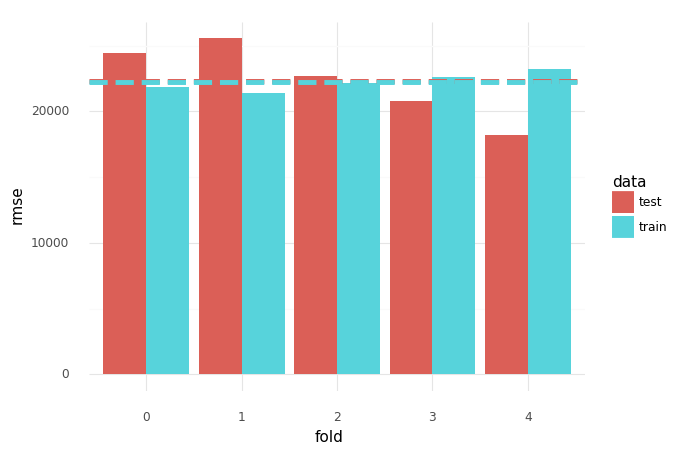

<ggplot: (7567481201)>

In [51]:
plt_df = (rmse_df.melt(id_vars=['fold'], var_name='data', value_name='rmse')
          .assign(mean = lambda d: d.groupby('data')['rmse'].transform(lambda x: x.mean()))
        )
(ggplot(plt_df, aes(x='fold', y='rmse', fill='data'))
 + geom_col(position='dodge')
 + geom_hline(aes(yintercept='mean', color='data'), linetype='--', size=2)
 + theme_minimal()
)



# Model Tuning

# Normalization

In [63]:
features = [col for col in finalx.columns if finalx[col].dtype in [np.float64, np.int64] and col!='Weekly_Sales']
X = finalx[features]
#Impute null values
for col in X:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)
y = finalx.Weekly_Sales

X_train, X_test, y_train, y_test = train_test_split(X,y)
ols = LinearRegression(normalize=True)
ols.fit(X_train, y_train)
print('Training r^2:', ols.score(X_train, y_train))
print('Testing r^2:', ols.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ols.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ols.predict(X_test)))

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Training r^2: 0.6584226889561708
Testing r^2: 0.6563074008439115
Training MSE: 175588238.12394258
Testing MSE: 179072302.08765903


In [ ]:
#Add Dummy
#NewX

In [57]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [60]:
L1 = LassoCV(normalize=True) #Lasso is also known as the L1 norm.
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))
print('Best alpha:', L1.alpha_)

Training r^2: 0.6584935288501039
Testing r^2: 0.6560382952479298
Training MSE: 13210.94979474805
Testing MSE: 13501.736964289117
Best alpha: 0.14122542723727177


In [65]:
import warnings
from plotnine import *

/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/adriansubagyo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


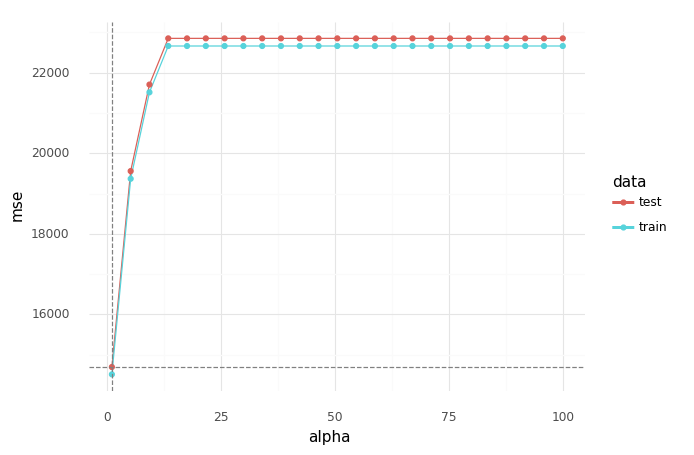

<ggplot: (-9223372029296454775)>

In [66]:
alphas = []
mse_tr = []
mse_te = []
for alpha in np.linspace(start=1, stop=100, num=25):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        L1 = Lasso(alpha=alpha, normalize=True)
        L1.fit(X_train, y_train)
    mse_tr.append(np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
    mse_te.append(np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))
    alphas.append(alpha)
    
mse_df = (pd.DataFrame({'alpha': alphas, 'train': mse_tr, 'test': mse_te})
          .assign(min_point = lambda d: d['test'].min())
          .assign(min_point = lambda d: d.apply(lambda x: 1 if x['test'] == x['min_point'] else 0, axis=1))
          .melt(id_vars=['alpha', 'min_point'], var_name='data', value_name='mse')
         )
min_alpha = mse_df.loc[lambda d: (d['min_point'] == 1) & (d['data'] == 'test'), 'alpha'].values[0]
min_mse = mse_df.loc[lambda d: (d['min_point'] == 1) & (d['data'] == 'test'), 'mse'].values[0]

(ggplot(mse_df, aes(x='alpha', y='mse', color='data'))
 + geom_line() + geom_point() 
 + geom_vline(xintercept=min_alpha, linetype='--', color='gray')
 + geom_hline(yintercept=min_mse, linetype='--', color='gray')
 + geom_text(x=min_alpha + 10, y=min_mse - 1000,
             label='alpha: {}, rmse: {}'.format(min_alpha.round(2).astype(str), min_mse.round(2).astype(str)),
             color='black'
            )
 + theme_minimal()
)

## Do linear regression, RidgeCV, LassoCV

In [147]:
#RidgeCV
#Rerun regression with NewXfill
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression

X = NewXfill
y = finalfill['Weekly_Sales']

reg = RidgeCV()
reg.fit(X, y)

finalfill['Estimated_Weekly_Sales'] = reg.predict(X)
print('R^2 model score:', linreg.score(X,y), '\n')

print('Model feature coefficients:')
#save result
filweight_dict_fill = dict(zip(X.columns, reg.coef_))
for feat, coeff in list(zip(X.columns, reg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 5)))

R^2 model score: 0.6579292154213883 

Model feature coefficients:
Temperature Coefficient weight: -12.17505
Fuel_Price Coefficient weight: -617.35377
MarkDown1 Coefficient weight: 0.02112
MarkDown2 Coefficient weight: -0.02844
MarkDown3 Coefficient weight: -0.03522
MarkDown4 Coefficient weight: -0.01482
MarkDown5 Coefficient weight: 0.0831
CPI Coefficient weight: 8.22707
Unemployment Coefficient weight: -367.0007
IsHoliday Coefficient weight: 611.70247
Store_1 Coefficient weight: 7014.48026
Store_2 Coefficient weight: 12170.08936
Store_3 Coefficient weight: -9467.54536
Store_4 Coefficient weight: 14483.63948
Store_5 Coefficient weight: -11206.73502
Store_6 Coefficient weight: 6765.36647
Store_7 Coefficient weight: -6804.85439
Store_8 Coefficient weight: -2639.99957
Store_9 Coefficient weight: -7672.76007
Store_10 Coefficient weight: 13126.92653
Store_11 Coefficient weight: 4081.29051
Store_12 Coefficient weight: 2599.57476
Store_13 Coefficient weight: 13319.53776
Store_14 Coefficient w

In [150]:
#LassoCV
#Rerun regression with NewXfill
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

X = NewXfill
y = finalfill['Weekly_Sales']

lasreg = LassoCV()
lasreg.fit(X, y)

finalfill['Estimated_Weekly_Sales'] = lasreg.predict(X)
print('R^2 model score:', lasreg.score(X,y), '\n')

print('Model feature coefficients:')
#save result
filweight_dict_fill = dict(zip(X.columns, lasreg.coef_))
for feat, coeff in list(zip(X.columns, lasreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 5)))

R^2 model score: 0.004887793554604336 

Model feature coefficients:
Temperature Coefficient weight: 0.0
Fuel_Price Coefficient weight: -0.0
MarkDown1 Coefficient weight: 0.11619
MarkDown2 Coefficient weight: 0.04192
MarkDown3 Coefficient weight: 0.14783
MarkDown4 Coefficient weight: 0.0
MarkDown5 Coefficient weight: 0.17611
CPI Coefficient weight: -0.0
Unemployment Coefficient weight: -0.0
IsHoliday Coefficient weight: 0.0
Store_1 Coefficient weight: 0.0
Store_2 Coefficient weight: 0.0
Store_3 Coefficient weight: -0.0
Store_4 Coefficient weight: 0.0
Store_5 Coefficient weight: -0.0
Store_6 Coefficient weight: 0.0
Store_7 Coefficient weight: -0.0
Store_8 Coefficient weight: -0.0
Store_9 Coefficient weight: -0.0
Store_10 Coefficient weight: 0.0
Store_11 Coefficient weight: 0.0
Store_12 Coefficient weight: -0.0
Store_13 Coefficient weight: 0.0
Store_14 Coefficient weight: 0.0
Store_15 Coefficient weight: -0.0
Store_16 Coefficient weight: -0.0
Store_17 Coefficient weight: -0.0
Store_18 Coe

In [ ]:
#model2

In [ ]:
#evaluation

In [ ]:
#further investigation

In [ ]:
#Your code here